In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics
import cv2
from glob import glob

Using TensorFlow backend.


In [19]:
x_train = glob("train/*/*")
x_test = glob("test/*/*")


print(len(x_train))
print(len(x_test))
print(x_train)

160
120
['train\\ad\\ad_train_1.jpg', 'train\\ad\\ad_train_10.jpg', 'train\\ad\\ad_train_11.jpg', 'train\\ad\\ad_train_12.jpg', 'train\\ad\\ad_train_13.jpg', 'train\\ad\\ad_train_14.jpg', 'train\\ad\\ad_train_15.jpg', 'train\\ad\\ad_train_16.jpg', 'train\\ad\\ad_train_17.jpg', 'train\\ad\\ad_train_18.jpg', 'train\\ad\\ad_train_19.jpg', 'train\\ad\\ad_train_2.jpg', 'train\\ad\\ad_train_20.jpg', 'train\\ad\\ad_train_21.jpg', 'train\\ad\\ad_train_22.jpg', 'train\\ad\\ad_train_23.jpg', 'train\\ad\\ad_train_24.jpg', 'train\\ad\\ad_train_25.jpg', 'train\\ad\\ad_train_26.jpg', 'train\\ad\\ad_train_27.jpg', 'train\\ad\\ad_train_28.jpg', 'train\\ad\\ad_train_29.jpg', 'train\\ad\\ad_train_3.jpg', 'train\\ad\\ad_train_30.jpg', 'train\\ad\\ad_train_31.jpg', 'train\\ad\\ad_train_32.jpg', 'train\\ad\\ad_train_33.jpg', 'train\\ad\\ad_train_34.jpg', 'train\\ad\\ad_train_35.jpg', 'train\\ad\\ad_train_36.jpg', 'train\\ad\\ad_train_37.jpg', 'train\\ad\\ad_train_38.jpg', 'train\\ad\\ad_train_39.jpg', 'tra

In [22]:
X_train = list()
Y_train = list()

dict = {'normal':0, 'ad':1}

for trainimage in x_train:
    image = cv2.imread(trainimage)
    image = cv2.resize(image, dsize=(28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.array(image)
    X_train.append(image)
    label = trainimage.split('\\')
    label = str(label[1])
    label = dict[label]
    Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train)
print(Y_train)
print('train_images shape: ', X_train.shape)
print('train_labels shape: ', Y_train.shape)

[[[ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  ...
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]]

 [[ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  ...
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]]

 [[ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  ...
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]]

 ...

 [[ 0  0 12 ... 10  0  0]
  [ 0  0 12 ... 11  0  0]
  [ 0  0 15 ... 12  0  0]
  ...
  [ 0  0 11 ... 10  0  0]
  [ 0  0 12 ... 14  0  0]
  [ 0  0 12 ... 16  0  0]]

 [[ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]
  [ 0  0 16 ... 16  0  0]
  ...
  [ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]]

 [[ 0  0 10 ... 10  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  8 ...  9  0  0]
  ...
  [ 0  0  9 ... 10  0  0]
  [ 0  0  9 ... 10  0  0]
  [ 0  0  9 ... 12  0  0]]]
[1 1 1 1 1

In [23]:
X_test = list()
Y_test = list()

dict = {'normal':0, 'ad':1}

for testimage in x_test:
    image = cv2.imread(testimage)
    image = cv2.resize(image, dsize=(28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.array(image)
    X_test.append(image)
    label = testimage.split('\\')
    label = str(label[1])
    label = dict[label]
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_train)
print(Y_train)
print('train_images shape: ', X_test.shape)
print('train_labels shape: ', Y_test.shape)

[[[ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  ...
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  9 ...  9  0  0]]

 [[ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  ...
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]
  [ 0  0  5 ...  5  0  0]]

 [[ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  ...
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]
  [ 0  0 11 ... 11  0  0]]

 ...

 [[ 0  0 12 ... 10  0  0]
  [ 0  0 12 ... 11  0  0]
  [ 0  0 15 ... 12  0  0]
  ...
  [ 0  0 11 ... 10  0  0]
  [ 0  0 12 ... 14  0  0]
  [ 0  0 12 ... 16  0  0]]

 [[ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]
  [ 0  0 16 ... 16  0  0]
  ...
  [ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]
  [ 0  0 15 ... 16  0  0]]

 [[ 0  0 10 ... 10  0  0]
  [ 0  0  9 ...  9  0  0]
  [ 0  0  8 ...  9  0  0]
  ...
  [ 0  0  9 ... 10  0  0]
  [ 0  0  9 ... 10  0  0]
  [ 0  0  9 ... 12  0  0]]]
[1 1 1 1 1

In [24]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [25]:
Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)
print(Y_train.shape)
print(Y_train.shape)

(160, 2)
(160, 2)



Epoch 00001: val_loss improved from inf to 0.67760, saving model to ./model/01-0.6776.hdf5

Epoch 00002: val_loss improved from 0.67760 to 0.62166, saving model to ./model/02-0.6217.hdf5

Epoch 00003: val_loss improved from 0.62166 to 0.50758, saving model to ./model/03-0.5076.hdf5

Epoch 00004: val_loss improved from 0.50758 to 0.35494, saving model to ./model/04-0.3549.hdf5

Epoch 00005: val_loss improved from 0.35494 to 0.25688, saving model to ./model/05-0.2569.hdf5

Epoch 00006: val_loss improved from 0.25688 to 0.17014, saving model to ./model/06-0.1701.hdf5

Epoch 00007: val_loss did not improve from 0.17014

Epoch 00008: val_loss did not improve from 0.17014

Epoch 00009: val_loss improved from 0.17014 to 0.08647, saving model to ./model/09-0.0865.hdf5

Epoch 00010: val_loss improved from 0.08647 to 0.05849, saving model to ./model/10-0.0585.hdf5

Epoch 00011: val_loss improved from 0.05849 to 0.04756, saving model to ./model/11-0.0476.hdf5

Epoch 00012: val_loss did not impro

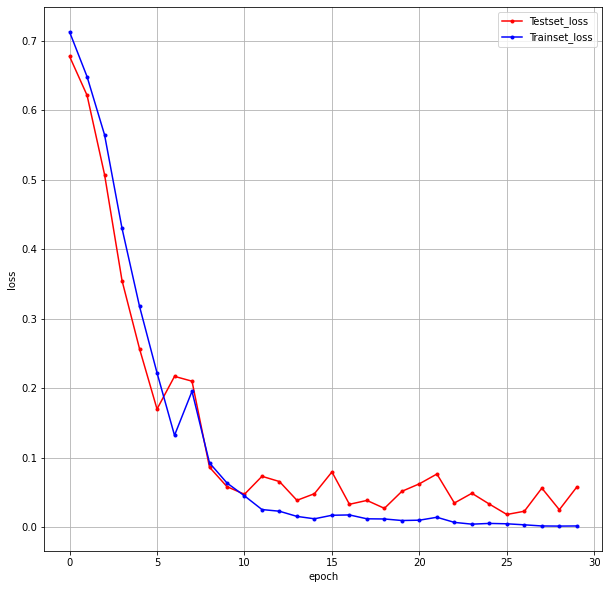

In [44]:
model = Sequential() #하나씩 층을 쌓아가면서 CNN 구조만들거임.
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))#32개의 피처맵이 나옴
# 컨볼루션 레이어를 하나 추가할건데 커널을 32개사용하겠다. 커널사이즈3*3, 인풋그림의 크기28*28
# Parameter 1: 커널을 몇 개 적용할지 정함. 여러개의 커널을 적용하면 서로 다른 featuremap이 여러개 나옴. 
# Parameter 2: 커널의 크기를 정함. kernel_size=(행, 열)  
# Parameter 3: input_shape: 맨 처음 층에는 입력되는 값을 알려주어야함 input_shape=(행, 열, 색상 rbg'3' 또는 흑백 bw'1').  
# Parameter 4: 활성화 함수
model.add(Conv2D(64, (3, 3), activation='relu')) #컨볼루션 층을 하나 더 추가
model.add(MaxPooling2D(pool_size=2)) #2*2에서 가장큰값을 추출
model.add(Dropout(0.25)) 
# 과적합을 피하기 위해서 dropout 사용. 25% 노드를 빼고 75%노드를 사용(4개라면 1개를 없애고 이것과 연결된 weight를 삭제=>계산량줄여줌)
model.add(Flatten()) #활성화함수를 사용하기전에 2차원을 1차원으로 바꿔줌,Flatten활성화함수를 사용하여 차원 변환
# Feature Extraction(Flatten위) -> Classification(Flatten아래파트 - 분류)
model.add(Dense(128,  activation='relu')) #입출력 레이어를 모두 연결해주는 것이 Dense Layer
#예: model.add(Dense(10)) : 출력노드 수를 10개로 두는데, 입력 값으로는 이전 층의 결과들을 사용
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) #최종출력 노드의 수는 클래스 갯수와 같은 10개로
############ 5
model.compile(loss='categorical_crossentropy', #loss fuction 설정
              optimizer='adam', #최적화 함수로 adam
              metrics=['accuracy'])

# 모델 최적화 설정: 각 epoch 마다 모델을 저장하기 위한 폴더를 만들고 저장설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=10, verbose=0, callbacks=[early_stopping_callback,checkpointer])
#epochs=30, batch_size=200: 샘플 200개를 모두 30번 실행하게끔 설정. 원래 60000개였음. 
#verbose 옵션은 학습 진행 상황에 대한 출력 여부를 지정 0(silent), 1(progress bar), 2(one line per epoch)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [36]:
print(X_train.shape[0])
print(X_test.shape[0])

160
120


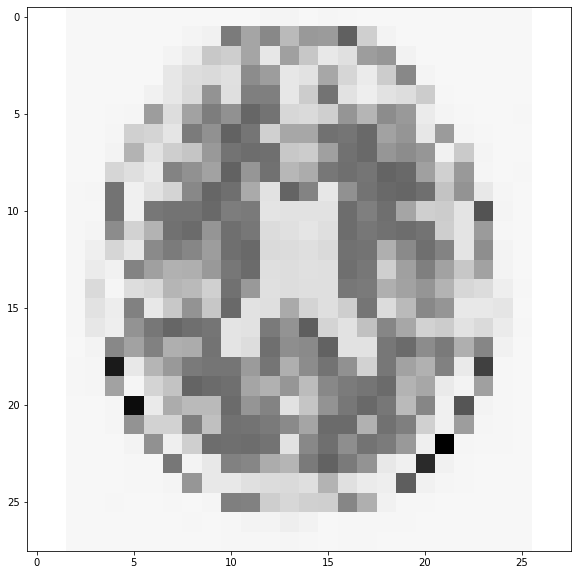

In [37]:
aa=numpy.reshape(X_train[0],(28,28))
plt.imshow(aa, cmap='Greys')
plt.show()

In [38]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0

In [39]:
Y_train[0]

array([0., 1.], dtype=float32)

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

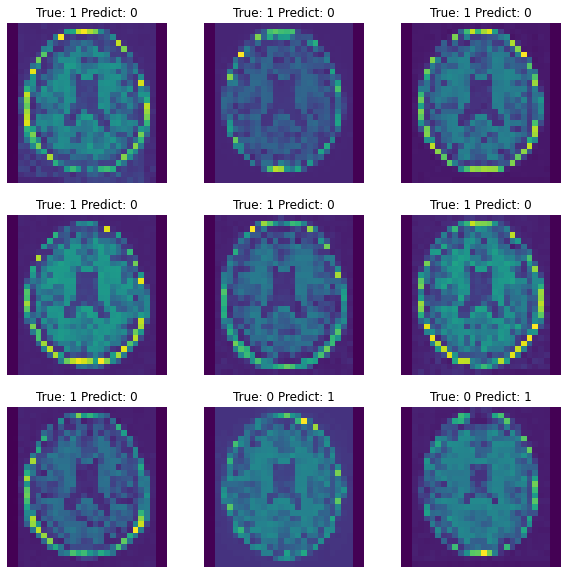

In [41]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Yhat_test = model.predict(X_test)


plt_row = 3
plt_col = 3

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col): 

    if np.argmax(Y_test[i]) == np.argmax(Yhat_test[i]): #정답인경우엔 넘어가고
        i += 1
        continue

    sub_plt = axarr[int(cnt/plt_row), cnt%plt_col] 
    sub_plt.axis('off')
    sub_plt.imshow(X_test[i].reshape(28,28))
    sub_plt_title = 'True: ' + str(np.argmax(Y_test[i])) + ' Predict: ' + str(np.argmax(Yhat_test[i]))    
    sub_plt.set_title(sub_plt_title)
    
    i += 1    
    cnt += 1

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

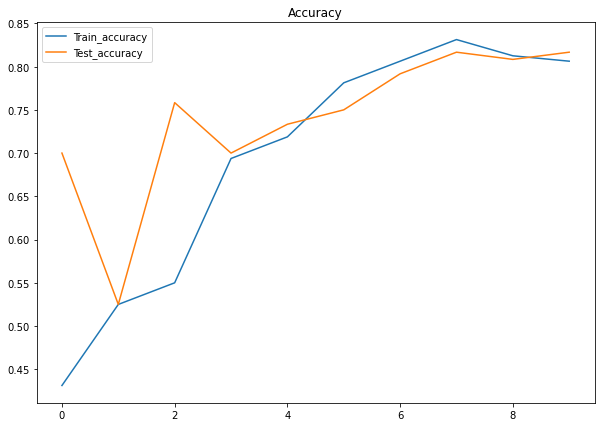

In [43]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Test_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show
